In [1]:
import pandas as pd
import pulp as p
import numpy as np

In [2]:
df = pd.read_csv('OPTProject_Marketing New.csv')

In [3]:
df['Revenue'] = 30000*df['conversionRate']*df['customerPurchaseAmt']#Find revenue
df['Profit'] = df['Revenue'] - df['cost']#Find Profit
df['Profit_perc'] = df["Profit"] / df["cost"] # Find the profit % per dollar invested

In [4]:
df.head(3)

,customerPurchaseAmt,platform,percentMale,percentFemale,existingCustomerReach,newCustomerReach,conversionRate,cost,Revenue,Profit,Profit_perc
0,12,Instagram,0.624179,0.375821,0.506594,0.493406,0.000289,99,104.15844,5.15844,0.052105
1,9,Instagram,0.465434,0.534566,0.565080,0.434920,0.000000,86,0.00000,-86.00000,-1.000000
2,23,Instagram,0.661922,0.338078,0.401214,0.598786,0.000619,110,426.85539,316.85539,2.880504


In [5]:
prob = p.LpProblem("Marketing_Optimization", p.LpMaximize)

In [6]:
items = []
for i in range(df.shape[0]):
    items.append(i) 

In [7]:
x = p.LpVariable.dicts("Investment",items,lowBound=0,upBound = 2000,cat='Continuous')#Set up desision variables
prob += p.lpSum([x[i]*(1+(df['Profit_perc'][i])) for i in items])#Set up objective function to maximize the profit
#Setting Contraints
prob+= p.lpSum([x[i] for i in items]) <= 2000 #Total price is less than 2000
for i in items:
    prob += x[i] <= df['cost'][i]#Total investment cant exeed total cost
prob.solve()#Solving the problem

1

In [8]:
print ("Status:", p.LpStatus[prob.status])
print ("Total Revenue from Marketing = ", p.value(prob.objective))

Status: Optimal
Total Revenue from Marketing =  21670.561162125003


In [9]:
# for i in items:
#     print("{} status {}".format(i, x[i].varValue))

In [10]:
invested_amount = []
for i in items:
    invested_amount.append(x[i].varValue)
df["Invested_amt"] = invested_amount
sel_df = df[df["Invested_amt"]>0]

In [11]:
print(f"Number of campaigns run : {sel_df.shape[0]}\nTotal cost : {sel_df['Invested_amt'].sum()}\nTotal profit : {sum(sel_df['Invested_amt']*(sel_df['Profit_perc']))}\nAverage percentage reach to existing customers : {sel_df['existingCustomerReach'].mean()}\nAverage percentage reach to new customers : {sel_df['newCustomerReach'].mean()}\nAverage percentage reach to female customers. : {sel_df['percentFemale'].mean()} ")

Number of campaigns run : 41
Total cost : 2000.0
Total profit : 19670.561162125003
Average percentage reach to existing customers : 0.5108253814634146
Average percentage reach to new customers : 0.48917461853658545
Average percentage reach to female customers. : 0.5199673731707317 


#### Problem 2  
Decide how much money to spend on the different ad campaigns to maximize total profit while meeting a budget of $2,000. Each campaign is all or nothing - you can either run the whole campaign for the full cost or not run it at all. Return the number of campaigns run, total cost, total profit, average percentage reach to existing customers, average percentage reach to new customers, and average percentage reach to female customers.

In [12]:
prob2 = p.LpProblem("Marketing_Optimization2", p.LpMaximize)
x2 = p.LpVariable.dicts("Investment",items,lowBound=0,upBound = 1,cat='Binary')#Now its just a choice rather than an investment value
prob2 += p.lpSum([x2[i]*df['Revenue'][i] for i in items])#objective function changes accordingly
prob2 += p.lpSum([df['cost'][i]*x2[i] for i in items]) <=2000 #Total price is less than 2000
prob2.solve()

1

In [13]:
print ("Status:", p.LpStatus[prob.status])
print ("Total Revenue from Marketing = ", p.value(prob.objective))

Status: Optimal
Total Revenue from Marketing =  21670.561162125003


In [14]:
invested_or_not = []
for i in items:
    invested_or_not.append(x2[i].varValue)
df["invested_or_not"] = invested_or_not
sel_df2 = df[df["invested_or_not"]>0]

In [15]:
print(f"Number of campaigns run : {sel_df2.shape[0]}\nTotal cost : {sel_df2['cost'].sum()}\nTotal profit : {sum(sel_df2['Profit'])}\nAverage percentage reach to existing customers : {sel_df2['existingCustomerReach'].mean()}\nAverage percentage reach to new customers : {sel_df2['newCustomerReach'].mean()}\nAverage percentage reach to female customers. : {sel_df2['percentFemale'].mean()} ")

Number of campaigns run : 41
Total cost : 2000
Total profit : 19636.367200000004
Average percentage reach to existing customers : 0.5177771554390244
Average percentage reach to new customers : 0.4822228445609757
Average percentage reach to female customers. : 0.5136494355609756 


In [16]:
items = []
for i in range(df.shape[0]):
    items.append(i)
prft_perc=[]
prft=[]
d=[]
#function to optimize marketing
def budget_analysis(budgetThreshold):
    prob = p.LpProblem("Marketing_Optimization", p.LpMaximize)#set up problem
    x = p.LpVariable.dicts("Investment",items,lowBound=0,upBound = budgetThreshold,cat='Continuous')#set up decision variable
    prob += p.lpSum([x[i]*(1+(1*df['Profit_perc'][i])) for i in items])#setup objective function
    prob+= p.lpSum([x[i] for i in items]) <= budgetThreshold#budget constraint
    for i in items:
        prob += x[i] <= df['cost'][i]#cost constraint
    prob.solve()
    invested_amount = []
    for i in items:
        invested_amount.append(x[i].varValue)
    df["Invested_amt"] = invested_amount
    sel_df = df[df["Invested_amt"]>0]
    print(f"Number of campaigns run : {sel_df.shape[0]}\nTotal cost : {sel_df['Invested_amt'].sum()}\nAverage Profit % : {100*(sel_df['Profit_perc'].mean())}\nTotal profit : {sum(sel_df['Invested_amt']*(sel_df['Profit_perc']))}\nAverage percentage reach to existing customers : {sel_df['existingCustomerReach'].mean()}\nAverage percentage reach to new customers : {sel_df['newCustomerReach'].mean()}\nAverage percentage reach to female customers. : {sel_df['percentFemale'].mean()} ")
    prft.append(sum(sel_df['Invested_amt']*sel_df['Profit_perc']))
    prft_perc.append(100*(sel_df['Profit_perc'].mean()))
    print("\n------------------------------------------------------\n")
    d.append({
        "budgetThreshold": budgetThreshold,
        "numberOfCampaigns": sel_df.shape[0],
        "totalCost": sel_df['Invested_amt'].sum(),
        "totalProfit": sum(sel_df['Invested_amt']*sel_df['Profit_perc']),
        "mean%reachToExistingCustomers": sel_df['existingCustomerReach'].mean(),
        "mean%reachToNewCustomersg": sel_df['newCustomerReach'].mean(),
        "mean%reachToFemaleCustomers": sel_df['percentFemale'].mean()
    })

In [17]:
for i in range(500,10500,500):
    budget_analysis(i)
res = pd.DataFrame(d)
print("Writing to Disk...")
res.to_csv('marketing_optimization.csv',index=False)#write to csv

Number of campaigns run : 13
Total cost : 500.0
Average Profit % : 1372.8637588243726
Total profit : 6918.086885081967
Average percentage reach to existing customers : 0.4759428641538461
Average percentage reach to new customers : 0.524057135846154
Average percentage reach to female customers. : 0.5238421566153846 

------------------------------------------------------

Number of campaigns run : 23
Total cost : 1000.0
Average Profit % : 1191.5303732380394
Total profit : 11770.413605
Average percentage reach to existing customers : 0.4796611088695653
Average percentage reach to new customers : 0.5203388911304347
Average percentage reach to female customers. : 0.528985073304348 

------------------------------------------------------

Number of campaigns run : 32
Total cost : 1500.0
Average Profit % : 1095.7010409010927
Total profit : 16029.393860689657
Average percentage reach to existing customers : 0.5135770280625
Average percentage reach to new customers : 0.48642297193750006
Averag

In [18]:
res

,budgetThreshold,numberOfCampaigns,totalCost,totalProfit,mean%reachToExistingCustomers,mean%reachToNewCustomersg,mean%reachToFemaleCustomers
0,500,13,500.0,6918.086885,0.475943,0.524057,0.523842
1,1000,23,1000.0,11770.413605,0.479661,0.520339,0.528985
2,1500,32,1500.0,16029.393861,0.513577,0.486423,0.509659
3,2000,41,2000.0,19670.561162,0.510825,0.489175,0.519967
4,2500,49,2500.0,22982.292019,0.500206,0.499794,0.524440
5,3000,56,3000.0,26019.616385,0.497640,0.502360,0.532519
6,3500,65,3500.0,28900.370811,0.486303,0.513697,0.530138
7,4000,73,4000.0,31678.473889,0.487389,0.512611,0.537048
8,4500,84,4500.0,34266.685565,0.493965,0.506035,0.521415
9,5000,92,5000.0,36646.789241,0.497459,0.502541,0.528709


#### Graphs for Presentation

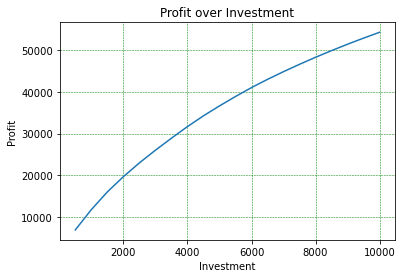

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.arange(500, 10500, 500),prft)


plt.title("Profit over Investment")
plt.xlabel("Investment")
plt.ylabel("Profit")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

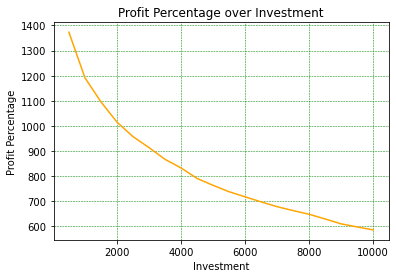

In [20]:
import matplotlib.pyplot as plt
plt.plot(np.arange(500, 10500, 500), prft_perc, color= "orange")


plt.title("Profit Percentage over Investment")
plt.xlabel("Investment")
plt.ylabel("Profit Percentage")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

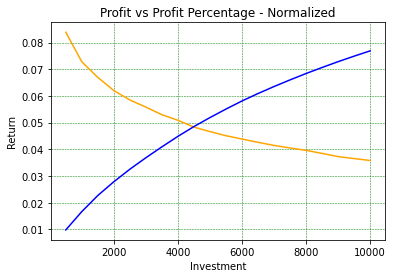

In [21]:
import matplotlib.pyplot as plt
plt.plot(np.arange(500, 10500, 500),[float(i)/sum(prft_perc) for i in prft_perc],color="orange")
plt.plot(np.arange(500, 10500, 500),[float(i)/sum(prft) for i in prft],color="blue")

plt.title("Profit vs Profit Percentage - Normalized")
plt.xlabel("Investment")
plt.ylabel("Return")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

### Financial Optimization  

You are looking at optimizing your portfolio by investing in various stocks on 3/27/2018 based on their daily performance over the course of March 2018. You are investing in a number of stocks for the next 20 trading days, assuming that they will have the same performance in the next 20 trading days that they did in March 2018. There are 448 stocks to choose from, all from the S&P500 index. Daily return mean and standard deviation are provided in the data as ret_mean and ret_std. Expected return dollars over the next 20 trading days is calculated as price*dailyAverageReturn*20. Expected risk dollars over the next 20 trading days is calculated as price*dailyReturnStandardDeviation*20.


In [22]:
df_finance = pd.read_csv('OPTProject_Financial.csv')

In [23]:
df_finance.head()

,ticker,ret_mean,ret_std,Name,Sector,price
0,A,0.000421,0.015030,Agilent Technologies Inc,Health Care,67.00
1,AAL,0.002873,0.016122,American Airlines Group,Industrials,50.90
2,AAP,0.001317,0.016038,Advance Auto Parts,Consumer Discretionary,115.01
3,AAPL,0.002299,0.017183,Apple Inc.,Information Technology,168.34
4,ABBV,0.012498,0.036981,AbbVie Inc.,Health Care,92.01


In [24]:
df_finance.columns

Index(['ticker', 'ret_mean', 'ret_std', 'Name', 'Sector', 'price'], dtype='object')

In [25]:
df_finance['ret_mean'] = df_finance['ret_mean'].apply(pd.to_numeric, errors='coerce')
df_finance['ret_std'] = df_finance['ret_std'].apply(pd.to_numeric, errors='coerce')
df_finance['price'] = df_finance['price'].apply(pd.to_numeric, errors='coerce')

In [26]:
df_finance['Expected_returndollars'] = 20*df_finance['price']*df_finance['ret_mean']#Find Expected Return Dollars 
df_finance['Expected_riskdollars'] = 20*df_finance['price']*df_finance['ret_std']#Find Expected Return Dollars 
df_finance['Expected_returndollars'] = df_finance['Expected_returndollars'].apply(pd.to_numeric, errors='coerce')
df_finance['Expected_riskdollars'] = df_finance['Expected_riskdollars'].apply(pd.to_numeric, errors='coerce')
df_finance.head()

,ticker,ret_mean,ret_std,Name,Sector,price,Expected_returndollars,Expected_riskdollars
0,A,0.000421,0.015030,Agilent Technologies Inc,Health Care,67.00,0.564352,20.140621
1,AAL,0.002873,0.016122,American Airlines Group,Industrials,50.90,2.924430,16.412583
2,AAP,0.001317,0.016038,Advance Auto Parts,Consumer Discretionary,115.01,3.030325,36.890410
3,AAPL,0.002299,0.017183,Apple Inc.,Information Technology,168.34,7.738903,57.851893
4,ABBV,0.012498,0.036981,AbbVie Inc.,Health Care,92.01,22.998199,68.053351


In [27]:
df_finance["return_perc"] = df_finance["Expected_returndollars"] / df_finance["price"]
df_finance["risk_perc"] = df_finance["Expected_riskdollars"] / df_finance["price"]

In [28]:
df_finance.head()

,ticker,ret_mean,ret_std,Name,Sector,price,Expected_returndollars,Expected_riskdollars,return_perc,risk_perc
0,A,0.000421,0.015030,Agilent Technologies Inc,Health Care,67.00,0.564352,20.140621,0.008423,0.300606
1,AAL,0.002873,0.016122,American Airlines Group,Industrials,50.90,2.924430,16.412583,0.057454,0.322448
2,AAP,0.001317,0.016038,Advance Auto Parts,Consumer Discretionary,115.01,3.030325,36.890410,0.026348,0.320758
3,AAPL,0.002299,0.017183,Apple Inc.,Information Technology,168.34,7.738903,57.851893,0.045972,0.343661
4,ABBV,0.012498,0.036981,AbbVie Inc.,Health Care,92.01,22.998199,68.053351,0.249953,0.739630


In [29]:
df_finance.shape[0]
df_finance = df_finance.dropna()
df_finance.shape[0]
df_finance = df_finance.reset_index()

In [30]:
items_1 = []
for i in range(df_finance.shape[0]):
    items_1.append(i)

In [31]:
prob1 = p.LpProblem("Finance_Optimization", p.LpMaximize)#Setup problem
x1 = p.LpVariable.dicts("Investment",items_1,lowBound=0,upBound = 20000,cat='Continuous')#Set up desision variables
prob1 += p.lpSum([((x1[i]*(1+df_finance['return_perc'][i]))-x1[i]) for i in items_1])#Objective function
prob1 += p.lpSum([x1[i] for i in items_1]) <= 20000#Setting constraint for budget
prob1+= p.lpSum([x1[i]*df_finance["risk_perc"][i] for i in items_1]) <= 5000#setting constraint for risk
for i in items_1:
    prob1 += x1[i] <= df_finance['price'][i]#setting constraint for investment
prob1.solve()#Solving the problem

1

In [32]:
print ("Status:", p.LpStatus[prob1.status])
print ("Total Return from Investing = ", p.value(prob1.objective))

Status: Optimal
Total Return from Investing =  1098.2724276677397


In [33]:
invested_amount = []
for i in items_1:
    invested_amount.append(x1[i].varValue)
df_finance["Invested_amt"] = invested_amount
sel_df = df_finance[df_finance["Invested_amt"]>0]

In [34]:
print(f"Number or Stocks bought : {sel_df.shape[0]}\nTotal money spent : {sel_df['Invested_amt'].sum()}\nExpected risk dollars : {(sel_df['risk_perc']*sel_df['Invested_amt']).sum()}\nExpected return dollars : {(sel_df['return_perc']*sel_df['Invested_amt']).sum()}")

Number or Stocks bought : 110
Total money spent : 12871.184600000002
Expected risk dollars : 5000.000020040261
Expected return dollars : 1098.2724276677395


In [35]:
sel_df["Sector"].value_counts()

Consumer Discretionary        27
Information Technology        18
Financials                    15
Health Care                   14
Materials                     10
Industrials                    7
Consumer Staples               7
Real Estate                    6
Energy                         2
Utilities                      2
Telecommunication Services     2
Name: Sector, dtype: int64

In [36]:
prob2 = p.LpProblem("Finance_Optimization2", p.LpMaximize)#setting up problem
x2 = p.LpVariable.dicts("Investment2",items_1,lowBound=0,upBound = 1,cat='Binary')#Now its just a choice rather than an investment value
prob2 += p.lpSum([x2[i]*df_finance['Expected_returndollars'][i] for i in items_1])#objective function changes accordingly
prob2 += p.lpSum([df_finance['price'][i]*x2[i] for i in items_1]) <=20000 #Total investment is less than 20000
prob2 += p.lpSum([df_finance['Expected_riskdollars'][i]*x2[i] for i in items_1]) <=5000 #risk should be lesser than 5000
prob2.solve()

1

In [37]:
print ("Status:", p.LpStatus[prob2.status])
print ("Total Revenue from Marketing = ", p.value(prob2.objective))

Status: Optimal
Total Revenue from Marketing =  1098.1654756627995


In [38]:
invested_amount = []
for i in items_1:
    invested_amount.append(x2[i].varValue)
df_finance["Invested_amt2"] = invested_amount
sel_df2 = df_finance[df_finance["Invested_amt2"]>0]

In [39]:
sel_df2["price"].sum()

12803.900000000003

In [40]:
print(f"Number or Stocks bought : {sel_df2.shape[0]}\nTotal money spent : {sel_df2['price'].sum()}\nExpected risk dollars : {sel_df2['Expected_riskdollars'].sum()}\nExpected return dollars : {sel_df2['Expected_returndollars'].sum()}")

Number or Stocks bought : 108
Total money spent : 12803.900000000003
Expected risk dollars : 4999.947560103799
Expected return dollars : 1098.1654756628


In [41]:
sel_df2["Sector"].value_counts()

Consumer Discretionary        27
Information Technology        18
Health Care                   14
Financials                    13
Materials                     10
Industrials                    7
Consumer Staples               7
Real Estate                    5
Energy                         3
Utilities                      2
Telecommunication Services     2
Name: Sector, dtype: int64

In [42]:
v=[]
ret=[]
rsk=[]
#Function to analyse investment
def investement_analysis(risk_threshold):
    items = []
    for i in range(df_finance.shape[0]):
        items.append(i)
    prob = p.LpProblem("Finance_Optimization_function", p.LpMaximize)#setup problme
    x = p.LpVariable.dicts("Investment",items,lowBound=0,upBound = 20000,cat='Continuous')#Set up desision variables
    prob += p.lpSum([((x[i]*(1+df_finance['return_perc'][i]))-x[i]) for i in items])#Setting Objective function
    #Setting constrains
    prob += p.lpSum([x[i] for i in items]) <= 20000#constraint on budget
    prob += p.lpSum([x[i]*df_finance["risk_perc"][i] for i in items]) <= risk_threshold#risk is passed to function
    for i in items:#constraint on investment
        prob += x[i] <= df_finance['price'][i]
    prob.solve()
    invested_amount = []
    for i in items:
        invested_amount.append(x[i].varValue)
    df_finance["Invested_amt"] = invested_amount
    sel_df = df_finance[df_finance["Invested_amt"]>0]
    print("\n------------------------------------------------------\n")
    print(f"Number or stocks bought : {sel_df.shape[0]}\nTotal money spent : {sel_df['Invested_amt'].sum()}\nExpected risk dollars : {(sel_df['risk_perc']*sel_df['Invested_amt']).sum()}\nExpected return dollars : {(sel_df['return_perc']*sel_df['Invested_amt']).sum()}")
    print(f"Number of stocks per sector : \n{sel_df['Sector'].value_counts()}")
    ret.append((sel_df['return_perc']*sel_df['Invested_amt']).sum())
    rsk.append((sel_df['risk_perc']*sel_df['Invested_amt']).sum())
    v.append({"riskDollarsThreshold":risk_threshold,
              "numberOfStocks":sel_df.shape[0],
              "totalMoneySpent":sel_df['Invested_amt'].sum(),
              "expectedRiskDollars":(sel_df['risk_perc']*sel_df['Invested_amt']).sum(),
              "expectedReturnDollars":(sel_df['return_perc']*sel_df['Invested_amt']).sum()
             })

In [43]:
for i in range(500,10500,500):
    investement_analysis(i)
res = pd.DataFrame(v)
print("Writing to Disk...")
res.to_csv('investment_optimization.csv',index=False)#write to csv


------------------------------------------------------

Number or stocks bought : 20
Total money spent : 1831.2615999999998
Expected risk dollars : 500.000000731
Expected return dollars : 181.57211661579998
Number of stocks per sector : 
Consumer Discretionary    8
Health Care               4
Consumer Staples          3
Information Technology    3
Materials                 2
Name: Sector, dtype: int64

------------------------------------------------------

Number or stocks bought : 37
Total money spent : 3023.7291000000005
Expected risk dollars : 999.9999983358581
Expected return dollars : 317.46488360476604
Number of stocks per sector : 
Consumer Discretionary    12
Health Care                8
Information Technology     5
Consumer Staples           4
Materials                  3
Real Estate                2
Financials                 2
Energy                     1
Name: Sector, dtype: int64

------------------------------------------------------

Number or stocks bought : 46
Total 

In [44]:
res

,riskDollarsThreshold,numberOfStocks,totalMoneySpent,expectedRiskDollars,expectedReturnDollars
0,500,20,1831.26160,500.000001,181.572117
1,1000,37,3023.72910,999.999998,317.464884
2,1500,46,3983.63160,1500.000129,438.813377
3,2000,52,4289.20228,1999.999998,556.813277
4,2500,70,5800.12910,2500.000006,663.751601
5,3000,73,7631.93000,2999.999804,760.460874
6,3500,89,9227.82470,3499.999998,853.588328
7,4000,94,10452.25560,3999.999998,938.434721
8,4500,96,11626.38200,4500.000021,1020.439752
9,5000,110,12871.18460,5000.000020,1098.272428


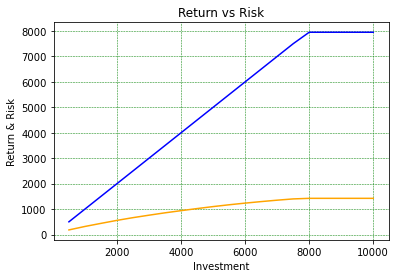

In [45]:
import matplotlib.pyplot as plt
plt.plot(np.arange(500, 10500, 500),ret,color="orange")
plt.plot(np.arange(500, 10500, 500),rsk,color="blue")

plt.title("Return vs Risk")
plt.xlabel("Investment")
plt.ylabel("Return & Risk")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

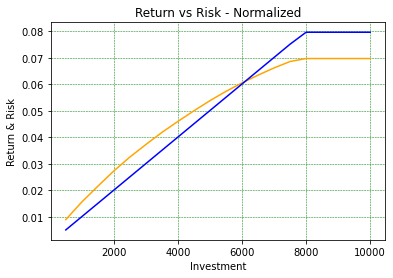

In [46]:
import matplotlib.pyplot as plt
plt.plot(np.arange(500, 10500, 500),[float(i)/sum(ret) for i in ret],color="orange")
plt.plot(np.arange(500, 10500, 500),[float(i)/sum(rsk) for i in rsk],color="blue")


plt.title("Return vs Risk - Normalized")
plt.xlabel("Investment")
plt.ylabel("Return & Risk")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()